<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/CustomizingVariousPartsOfNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reference for this notebook: https://www.youtube.com/watch?v=BrLnT9xIMpk
import tensorflow as tf

In [2]:
# 10 neurons in first hidden layer and input is 5 dimensional
layer = tf.keras.layers.Dense( 10, input_shape = (None, 5) )

In [3]:
# See it's dimensions is also 5
data = tf.random.normal( shape = [100, 5] )

In [5]:
# passing data to layer and inspecting output
layer(data).shape

TensorShape([100, 10])

In [ ]:
# shape [100, 10], because for each sample, we have 10 outputs (1, 10)
# since we have 100 such samples, therefore (100, 10)

In [6]:
# visualzing actual outputs
layer(data)

<tf.Tensor: shape=(100, 10), dtype=float32, numpy=
array([[ 1.40175271e+00,  1.32146978e+00, -8.88355851e-01,
         1.08817339e+00,  7.69938529e-01, -5.87104082e-01,
         6.08301282e-01, -3.27149838e-01, -2.22803503e-01,
        -8.34992528e-01],
       [ 1.60975623e+00,  6.27872884e-01,  6.30713940e-01,
        -6.85951769e-01, -6.33265197e-01, -6.09155536e-01,
         7.88632691e-01,  4.46012825e-01, -9.33828056e-01,
         1.52734637e-01],
       [ 7.76214227e-02,  1.73141256e-01, -1.95580453e-01,
         1.15459538e+00, -1.86547548e-01,  1.99698642e-01,
        -2.86875695e-01,  1.52686223e-01, -6.54510021e-01,
        -3.94392870e-02],
       [ 2.54091769e-01,  4.10836250e-01, -6.06219649e-01,
        -3.95617664e-01,  1.03496146e+00, -6.87325120e-01,
         3.73054624e-01, -3.34492773e-01,  9.55998838e-01,
        -8.56128275e-01],
       [ 6.89389333e-02, -9.09651592e-02, -7.16798902e-01,
        -1.58696532e+00,  1.38101554e+00,  1.76324576e-01,
         5.13045311

In [7]:
# you can check all the weights and biases by
# it will return weights and biases both together
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.53487855,  0.5798524 , -0.516847  ,  0.48466545,  0.5186234 ,
         -0.31377834,  0.24460626, -0.20128453,  0.07830161, -0.5192616 ],
        [-0.23326132,  0.26409405, -0.39647788,  0.40537375,  0.4056105 ,
          0.14198261,  0.08831298, -0.44478667,  0.48802048,  0.17438161],
        [ 0.58458644,  0.2465564 , -0.06695551,  0.29014546, -0.20168456,
          0.57874006,  0.19628358, -0.385196  , -0.52974355,  0.16137683],
        [-0.07723755,  0.02971619,  0.2958964 ,  0.55539364, -0.49400154,
         -0.24676418, -0.2075854 ,  0.59512025, -0.54978055,  0.3324213 ],
        [-0.4064146 , -0.44570333, -0.20021993,  0.43550414,  0.04125905,
          0.3403275 , -0.5582908 ,  0.07933545, -0.22591457, -0.5205131 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [8]:
# inorder to access them seperately 
# For accessing only weights
print(layer.kernel)

# For accessing only biases
print(layer.bias)

<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.53487855,  0.5798524 , -0.516847  ,  0.48466545,  0.5186234 ,
        -0.31377834,  0.24460626, -0.20128453,  0.07830161, -0.5192616 ],
       [-0.23326132,  0.26409405, -0.39647788,  0.40537375,  0.4056105 ,
         0.14198261,  0.08831298, -0.44478667,  0.48802048,  0.17438161],
       [ 0.58458644,  0.2465564 , -0.06695551,  0.29014546, -0.20168456,
         0.57874006,  0.19628358, -0.385196  , -0.52974355,  0.16137683],
       [-0.07723755,  0.02971619,  0.2958964 ,  0.55539364, -0.49400154,
        -0.24676418, -0.2075854 ,  0.59512025, -0.54978055,  0.3324213 ],
       [-0.4064146 , -0.44570333, -0.20021993,  0.43550414,  0.04125905,
         0.3403275 , -0.5582908 ,  0.07933545, -0.22591457, -0.5205131 ]],
      dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


<h1>Creating custom layer</h1>
<p>
For this we have to implement 3 functions<br />
__init__ : where we can do all input independent initialization<br />
build: where you know the shape of input tensors and can do the rest of the initialization <br />
call: where you do the forward propagation



In [16]:
# This is basically doing the same function as dense layer
class MyDense(tf.keras.layers.Layer):
    def __init__(self, n_output_neurons):
        super(MyDense, self).__init__()
        # number of output neurons
        self.n_output_neurons = n_output_neurons
    
    def build(self, input_shape):
        #  say previous layer has 10 output neurons, so for this layer shape of weight will be(10, number_of_neurons_we_want_in_this_layer)                                                        
        self.my_weight = self.add_weight(name = "my_weights", shape = [ int(input_shape[-1]), self.n_output_neurons ])
    
    # Doing forward propagation
    def call(self, input_to_this_layer):
        return tf.matmul( input_to_this_layer, self.my_weight )

In [17]:

layer = MyDense(n_output_neurons = 10)

input_to_layer = tf.random.normal( shape = [100, 5] )

# so network is like this: 5(input_layer) -> 10(output_layer)

In [18]:
# when this cell will run it will call first build, initialize weights and then call "call" function for forward propagtion
# and this will return the result of forward propagtion 

# so the expected output shape should be (100, 10)
layer( input_to_layer ).shape

TensorShape([100, 10])

In [19]:
# visualizing actual output
layer( input_to_layer )

<tf.Tensor: shape=(100, 10), dtype=float32, numpy=
array([[-1.58042699e-01,  1.98492360e+00,  4.98412460e-01,
         1.12200201e+00, -9.16924775e-01, -2.36384225e+00,
         8.72631192e-01, -8.90782654e-01,  7.43751287e-01,
        -3.87834996e-01],
       [-1.48991987e-01, -2.79033750e-01, -3.66351306e-01,
         4.19903696e-02, -1.74031258e-01, -2.43955493e-01,
        -7.66351521e-01,  2.18119770e-01, -1.71292216e-01,
         8.14494640e-02],
       [-3.15125555e-01,  4.11346823e-01,  8.48584715e-03,
         1.24106920e+00, -1.67201805e+00, -1.14013135e+00,
        -1.21713901e+00, -5.73073506e-01,  7.74170220e-01,
         6.18768632e-01],
       [ 2.42957175e-01,  9.29765761e-01,  8.64858627e-01,
         1.61746323e-01,  1.14860497e-01,  2.88637698e-01,
         1.76408875e+00, -3.41042906e-01,  5.56145191e-01,
        -3.79477322e-01],
       [ 8.71489868e-02, -2.30081558e-01,  5.36572225e-02,
        -6.60666943e-01,  8.79752755e-01,  1.33304560e+00,
         1.06785798

In [20]:
# For checking variables ( both weights and biases )
layer.variables

[<tf.Variable 'my_dense_1/my_weights:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.09540927,  0.214118  ,  0.06230956,  0.49135143, -0.53680545,
         -0.53069955,  0.24894172, -0.55509436,  0.4948004 ,  0.10368836],
        [-0.2232661 , -0.34200788, -0.36654446,  0.2518925 , -0.43693298,
         -0.15133771, -0.5702134 ,  0.20620114,  0.12207198,  0.00371301],
        [ 0.00472951,  0.37072974,  0.15223187,  0.31531203, -0.40574795,
         -0.55279076, -0.5233058 , -0.36892617,  0.07882035,  0.38015085],
        [-0.17359239,  0.30501342, -0.2314339 ,  0.08569545,  0.02472746,
         -0.6015588 ,  0.2964899 ,  0.33998507, -0.02551383, -0.5880629 ],
        [-0.17090201,  0.46139067,  0.07643515,  0.39923626, -0.43865663,
         -0.17709854,  0.1698516 ,  0.51492673,  0.3097319 , -0.4897855 ]],
       dtype=float32)>]

In [23]:
# inorder to access them seperately 
# For accessing only weights, keras by default names the weight variable as kernel, but in this example we have named weight variable as my_weight
print(layer.my_weight)

# by default keras creates the bias for the layer, but we have not added it in out layer, therefore 
# print( layer.bias ) will result in error

<tf.Variable 'my_dense_1/my_weights:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.09540927,  0.214118  ,  0.06230956,  0.49135143, -0.53680545,
        -0.53069955,  0.24894172, -0.55509436,  0.4948004 ,  0.10368836],
       [-0.2232661 , -0.34200788, -0.36654446,  0.2518925 , -0.43693298,
        -0.15133771, -0.5702134 ,  0.20620114,  0.12207198,  0.00371301],
       [ 0.00472951,  0.37072974,  0.15223187,  0.31531203, -0.40574795,
        -0.55279076, -0.5233058 , -0.36892617,  0.07882035,  0.38015085],
       [-0.17359239,  0.30501342, -0.2314339 ,  0.08569545,  0.02472746,
        -0.6015588 ,  0.2964899 ,  0.33998507, -0.02551383, -0.5880629 ],
       [-0.17090201,  0.46139067,  0.07643515,  0.39923626, -0.43865663,
        -0.17709854,  0.1698516 ,  0.51492673,  0.3097319 , -0.4897855 ]],
      dtype=float32)>


<h3> It will be more favourable if we can define out custom training loop</h3>
<p> Therefore tensorflow provides tf.GradientTape API for automatic differentiation ( computing the gradient of computation w.r.t its input variables) <br />

Tensorflow records all operations executed inside the context of tf.GradientTape on to a "tape".<br />
Tensorflow then uses that tape and the gradients associated with each recorded operation to compute the gradient of recorded computation using reverse mode differentiation.

In [ ]:
# For example shown here we will construct a computation graph and workout the derivates
# We compare the manually calculate derivatives with automatic differentiation
# Any computation in a tape is recorded

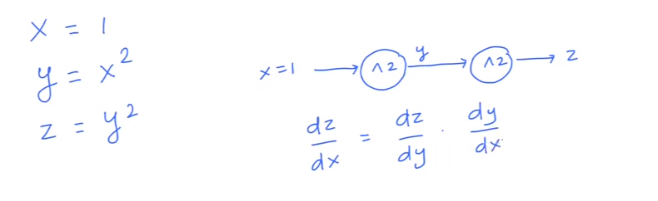

In [24]:
x = tf.Variable(1.0)
with tf.GradientTape() as tape:
    y = x**2
    z = y**2
    # therefore dz_dx = 2(y).2(x), since y = x^2, therefore, dz_dx = 2(x^2).2(x) -> 4(x^3), when x = 1.0, dz_dx = 4
    # dz_dy = 2(y), since y = x^2, therefore, dz_dy = 2(x^2), when x = 1.0, dz_dy = 2

#              i.e calculate gradient of z w.r.t x and y
dz_dx, dz_dy = tape.gradient( z, [x, y] )

In [25]:
print(dz_dx.numpy())
print(dz_dy.numpy())

4.0
2.0
